In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv("books.csv")
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


Hacemos una copia de nuestro df para utilizarlo en algunos ejercicios.

In [3]:
df_copia = df.copy()

# Ejercicio 1

- Tablas de contigencia

In [4]:
min = df["User Rating"].describe()[3]
min

3.3

In [5]:
max = df["User Rating"].describe()[6]
max

4.8

Obtengo el valor mín y max de mi columna para saber el rango en el que varía los datos y así calcular los diferentes intervalos de datos (bins)

In [6]:
bins = np.arange(min-0.5,max+1, 0.50)
bins

array([2.8, 3.3, 3.8, 4.3, 4.8, 5.3])

In [125]:
np.select(df["Price"] == 105, df["Name"])

array('Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5',
      dtype='<U121')

In [7]:
df_copia["User_rating_group"] = pd.cut(df["User Rating"], bins = bins)
df_copia.sample(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
424,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,4.5,22641,11,2016,Non Fiction,"(4.3, 4.8]"
535,Where the Wild Things Are,Maurice Sendak,4.8,9967,13,2009,Fiction,"(4.3, 4.8]"


Hemos creado una columna nueva *'User_rating_group'* asignando a nuestra columna *'User rating'* un intervalo u otro dependiendo de su valor (bins). Observamos cuántos registros se han clasificado en cada uno de los intervalos. Por simple curiosidad.

In [8]:
df_copia["User_rating_group"].value_counts()

(4.3, 4.8]    438
(3.8, 4.3]     56
(4.8, 5.3]     52
(3.3, 3.8]      3
(2.8, 3.3]      1
Name: User_rating_group, dtype: int64

Creamos la tabla de contingencia

In [9]:
contig_num= pd.crosstab(df_copia["User_rating_group"], df_copia["Genre"], margins =True )
contig_num

Genre,Fiction,Non Fiction,All
User_rating_group,,,
"(2.8, 3.3]",1,0,1
"(3.3, 3.8]",3,0,3
"(3.8, 4.3]",26,30,56
"(4.3, 4.8]",169,269,438
"(4.8, 5.3]",41,11,52
All,240,310,550


Hemos hecho nuestra tabla de contigencia con una variable numérica y una categórica. 
Observamos que los libros del género **Non Fiction** tiene una frecuencia mayor en altas valoraciones (ratings) de l@s usuria@s.

También vemos que la frecuencia de valoraciones media-altas (de 4.3 a 4.8) es muy superior tanto para el género **Fiction** como **Non Fiction** respecto a las de valores bajas o medias-bajas (2.8, 3.3 hasta 3.8, 4.3 ). Esto tiene sentido porque nuestros datos son los libros más vendidos (mejor valorados -> más se venden)

In [10]:
contig = pd.crosstab(df["Genre"], df["Author"])
contig

Author,Abraham Verghese,Adam Gasiewski,Adam Mansbach,Adir Levy,Admiral William H. McRaven,Adult Coloring Book Designs,Alan Moore,Alex Michaelides,Alice Schertle,Allie Brosh,...,Todd Burpo,Tony Hsieh,Tucker Carlson,Veronica Roth,W. Cleon Skousen,Walter Isaacson,William Davis,William P. Young,Wizards RPG Team,Zhi Gang Sha
Genre,,,,,,,,,,,,,,,,,,,,,
Fiction,2,0,1,1,0,0,1,1,1,0,...,0,0,0,4,0,0,0,2,3,0
Non Fiction,0,1,0,0,1,1,0,0,0,1,...,2,1,1,0,1,3,2,0,0,2


Hemos intentando crear una tabla de contigencia con dos variables categóricas de nuestro df pero observamos que en principio no podemos sacar conclusiones debido a la naturaleza de nuestros datos.

# Coeficiente de correlación

- Coeficiente de correlación de Pearson de nuestras variables numéricas

In [11]:
df_copia.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,"(4.3, 4.8]"
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,"(4.3, 4.8]"
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,"(4.3, 4.8]"
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,"(4.3, 4.8]"
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,"(4.3, 4.8]"


In [12]:
df_numericas = df.select_dtypes(exclude = "object")
df_numericas

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [13]:
del df_numericas["Year"]

In [14]:
df_numericas.dtypes

User Rating    float64
Reviews          int64
Price            int64
dtype: object

In [15]:
cor2 = np.corrcoef(df_numericas)
cor2

array([[1.        , 0.99997389, 0.99999995, ..., 1.        , 1.        ,
        1.        ],
       [0.99997389, 1.        , 0.99997605, ..., 0.99997414, 0.99997414,
        0.99997414],
       [0.99999995, 0.99997605, 1.        , ..., 0.99999996, 0.99999996,
        0.99999996],
       ...,
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99997414, 0.99999996, ..., 1.        , 1.        ,
        1.        ]])

In [16]:
cor = np.corrcoef(df["User Rating"],df["Price"])
cor

array([[ 1.        , -0.13308629],
       [-0.13308629,  1.        ]])

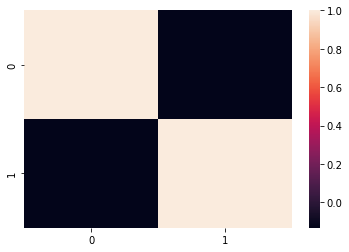

In [31]:
fig = sns.heatmap(data = (cor))

In [17]:
cor_total = np.corrcoef(df["Reviews"],df["Price"])
cor_total

array([[ 1.        , -0.10918188],
       [-0.10918188,  1.        ]])

Observamos que no existe correlación entre las variables `Price` y `User Ratings` ya que el valor del coeficiente de correlación es muy próximo a 0. Tampoco encontramos relación entre las variables `Reviews`y `Price` con una correlación de -0.10. 

# Sesgo

- Sesgos de alguna variable numérica

In [25]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [18]:
media = np.mean(df["Price"])
media

13.1

In [19]:
std = np.std(df["Price"])
std

10.83240089227266

In [20]:
sesgo = skew(df["Price"])
sesgo

3.674998760184651

Como nuestro valor del sesgo es positivo, deducimos que nuestros valores de Price están sesgado de forma positiva, a la izquierda. 

In [21]:
x1 = media
x2 = std

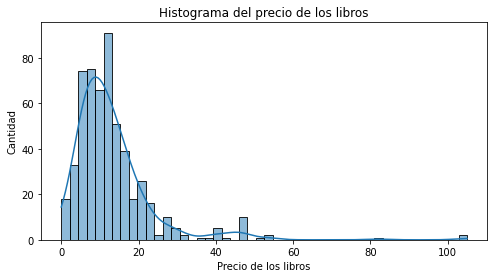

In [22]:
plt.figure(figsize =(8,4))
fig = sns.histplot(x=df["Price"], kde = True)
fig.set(xlabel='Precio de los libros', ylabel = 'Cantidad')
fig.set_title('Histograma del precio de los libros')
plt.show()

Como observamos en el histograma, confirmamos que los valores de nuestros precios están sesgados a la izquierda. Así, se soportan nuestras conclusiones del sesgo y de la media de que están sesgados positivamente, hacia la izquierda.

- Para entender un poco mejor nuestros datos, nos preguntamos si existe relación entre el precio del libro y su valoración por los usuarios.

In [23]:
r2_price_ratings = np.corrcoef(df["Price"], df["User Rating"])
r2_price_ratings

array([[ 1.        , -0.13308629],
       [-0.13308629,  1.        ]])

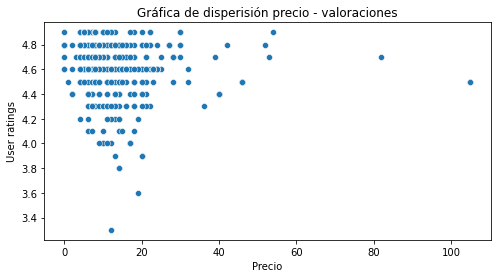

In [24]:
plt.figure(figsize =(8,4))
fig = sns.scatterplot(x=df["Price"], y=df["User Rating"], data = df)
fig.set(xlabel='Precio', ylabel = 'User ratings')
fig.set_title('Gráfica de disperisión precio - valoraciones')
plt.show()

Vemos que no hay relación entre el precio de los libros y su valoración, esto es, podemos encontrar libros muy bien valorados con precios altos y bajos sin ningún tipo de 'patrón'. Podemos ver esta 'no relación' númericamente en el array del coeficiente de correlación ya que nos da el valor (-0.133) y gráficamente porque no encontramos un patrón definido.

# Intervalo de confianza

In [37]:
df_numericas

,User Rating,Reviews,Price
0,4.7,17350,8
1,4.6,2052,22
2,4.7,18979,15
3,4.7,21424,6
4,4.8,7665,12
...,...,...,...
545,4.9,9413,8
546,4.7,14331,8
547,4.7,14331,8
548,4.7,14331,8


In [25]:
df_numericas["User Rating"]

0      4.7
1      4.6
2      4.7
3      4.7
4      4.8
      ... 
545    4.9
546    4.7
547    4.7
548    4.7
549    4.7
Name: User Rating, Length: 550, dtype: float64

In [26]:
data = df_numericas["User Rating"]

In [27]:
pd.options.display.float_format = '{:.2f}'.format
intervalos = st.t.interval(alpha = 0.95, df = len(data)-1, loc= np.mean(data),scale=st.sem(data))
print(intervalos)

#Lo comparamos con la media
print(np.mean(data))

(4.5993522611600755, 4.637375011567207)
4.618363636363641


Observamos cual es el intervalo de confianza con un 95%. Y efectivamente si calculamos la media, esta se encuentra entre los dos valores dados. 

Tendremos en cuenta que el nivel de confianza y la amplitud del intervalo variarán conjuntamente. Es decir, un intervalo de valores más amplio tendrá más probabilidad de cumplirse (mayor nivel de confianza), mientras que un intervalo más pequeño, que ofrece una estimación más precisa, tendrá una probabilidad de error también más elevada

# Exploración de nuestros datos

- El libro más caro

In [28]:
np.select(df["Price"] == df["Price"].max(), df["Name"])

array('Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5',
      dtype='<U121')

- El libro más barato

In [29]:
np.select(df["Price"] == df["Price"].min(), df["Name"])

array('Cabin Fever (Diary of a Wimpy Kid, Book 6)', dtype='<U121')

- Distribución, media, sesgo.

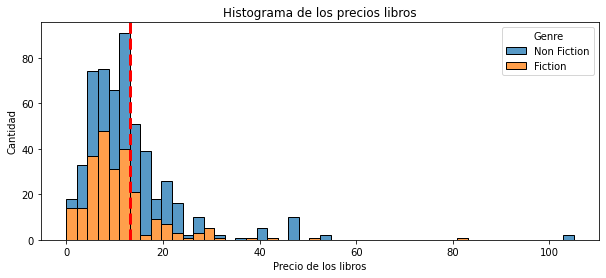

In [30]:
plt.figure(figsize =(10,4))
fig = sns.histplot(x=df["Price"], data = df, hue ="Genre", multiple = "stack")
plt.axvline(df["Price"].mean(), color='r', linestyle='dashed', linewidth=3)
fig.set(xlabel='Precio de los libros', ylabel = 'Cantidad')
fig.set_title('Histograma de los precios libros')
plt.show()

In [107]:
df["Price"].mean()

13.1

Observamos que la distribución de nuestros datos no es normal y que tiene una media entorno a 13. Hay un sesgo positivo (nuestros datos tienden a la izquierda) lo que quiere decir que es más frecuente que nuestros libros tengan precios bajos que altos. 
También observamos que hay más libros caros del género Non Fiction que Fiction ya que en el extremo derecho observamos barritas azules (Non Fiction) pero apenas naranjas (Fiction)

- Nos preguntamos cuántos libros se han publicado cada año respecto a su género

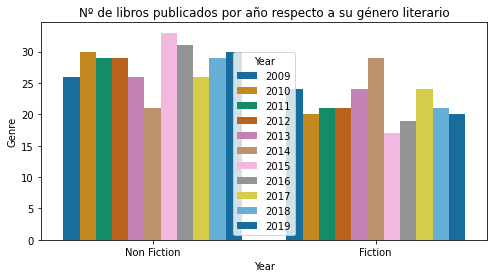

In [31]:
plt.figure(figsize =(8,4))
fig = sns.countplot(x= df_copia["Genre"],data = df_copia, hue = "Year", palette ="colorblind")
fig.set(xlabel='Year', ylabel= 'Genre')
fig.set_title('Nº de libros publicados por año respecto a su género literario')
plt.show()

En la gráfica podemos comparar cuántos libros del género Non Fiction y Fiction se han publicado en diferentes años. Vemos grandes diferencias en los años 2015, 2016 y 2018.

- Los top's de los top's!!! ¿Cuántas veces han aparecido los 10 libros más vendidos en la lista de los más vendidos?

In [45]:
name_ordenado = df["Name"].value_counts()
df_name_ordenado = name_ordenado.reset_index()

In [52]:
df_name_ordenado.head()

,index,Name
0,Publication Manual of the American Psychologic...,10
1,StrengthsFinder 2.0,9
2,"Oh, the Places You'll Go!",8
3,The Very Hungry Caterpillar,7
4,The 7 Habits of Highly Effective People: Power...,7


In [46]:
df_name_ordenado_10 = df_name_ordenado[:10]
df_name_ordenado_10.shape

(10, 2)

In [47]:
df_name_ordenado_10 = df_name_ordenado_10.rename(columns={'index':'name', 'Name':'cantidad'})
df_name_ordenado_10.shape

(10, 2)

In [48]:
df_name_ordenado_10

,name,cantidad
0,Publication Manual of the American Psychologic...,10
1,StrengthsFinder 2.0,9
2,"Oh, the Places You'll Go!",8
3,The Very Hungry Caterpillar,7
4,The 7 Habits of Highly Effective People: Power...,7
5,The Four Agreements: A Practical Guide to Pers...,6
6,Jesus Calling: Enjoying Peace in His Presence ...,6
7,The Official SAT Study Guide,5
8,To Kill a Mockingbird,5
9,The 5 Love Languages: The Secret to Love That ...,5


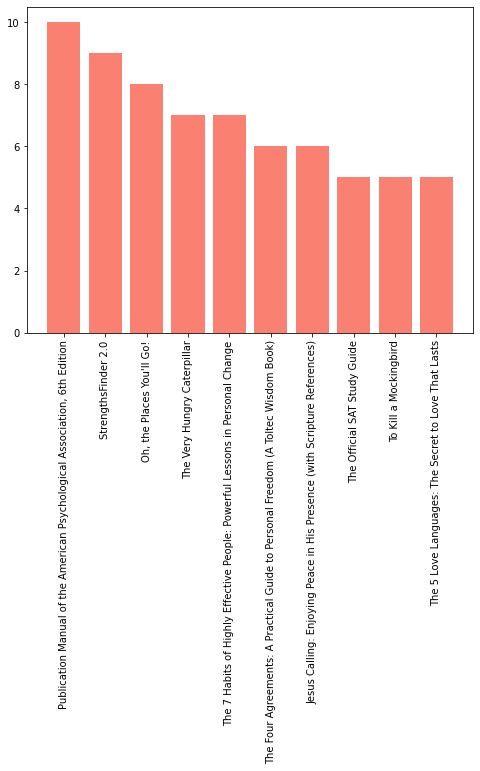

In [49]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.bar(df_name_ordenado_10['name'], df_name_ordenado_10["cantidad"], color = 'Salmon');

El primer libro que observamos ha aparecido en la lista de los más vendidos 10 veces, es decir, ha aparecido TODOS los años en la lista de los más vendidos (desde 2009 - 2019). El décimo libro ha aparecido 5 veces en la lista entre 2009 y 2019.

- Aquí podemos observar en qué año ha aparecido cada uno de los libros en la lista de más vendidos de Amazon.

In [57]:
frecuentes= df["Name"].value_counts()[0:50]
values = frecuentes.keys().to_list()
df_name = df[df["Name"].isin(values)]
df_name.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.70,22614,11,2010,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.70,22614,11,2011,Fiction


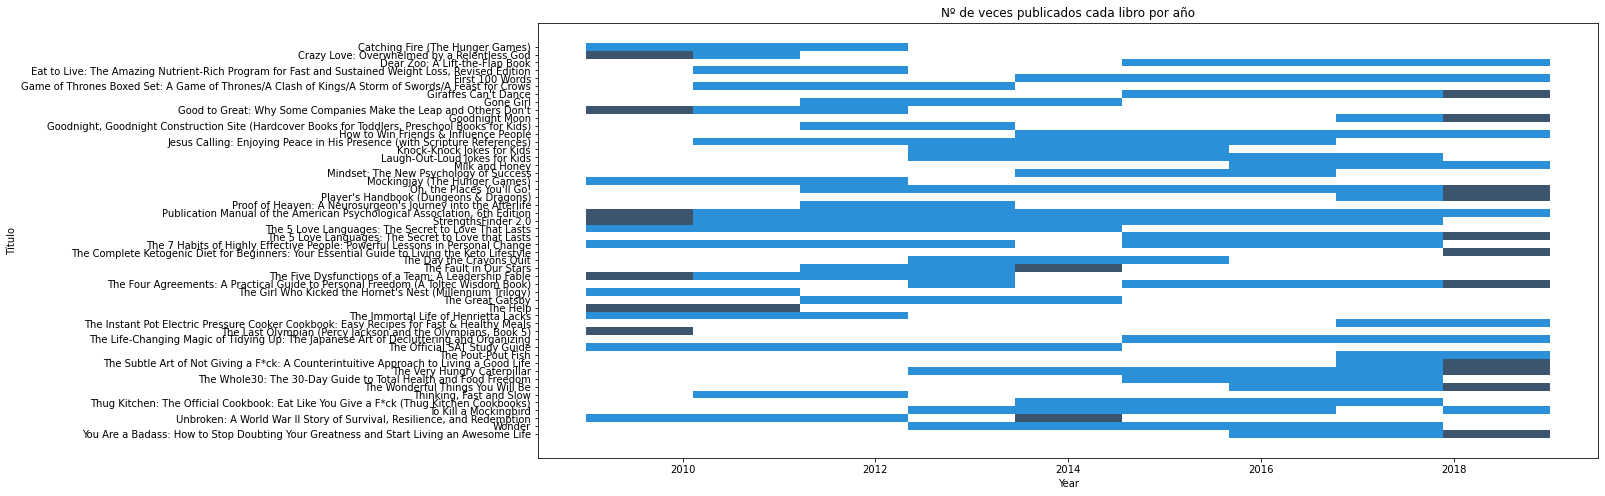

In [56]:
plt.figure(figsize =(19, 8))
fig = sns.histplot(x= df_name["Year"], y=df_name["Name"], data= df)
fig.set(xlabel='Year', ylabel= 'Título')
fig.set_title('Nº de veces publicados cada libro por año')
plt.show();

- ¿Qué libros son más caros: los libros del género NF o los del F?

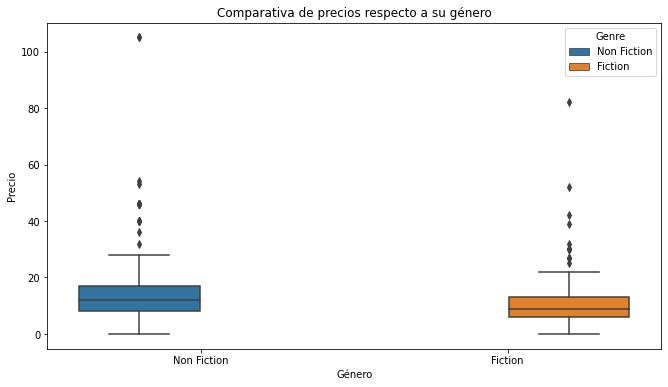

In [58]:
# Boxplot por vertical, por isla
plt.figure(figsize =(11,6))
fig = sns.boxplot(x= 'Genre', y ='Price',hue= 'Genre', data = df)
fig.set(xlabel='Género', ylabel= 'Precio' )
fig.set_title('Comparativa de precios respecto a su género')
plt.show()

Podemos ver que los libros del género **Non Fiction** y **Fiction** no se diferencian en precio.

- ¿Existen diferencias de precio (por rangos) respecto de las valoraciones de l@s usuari@s?

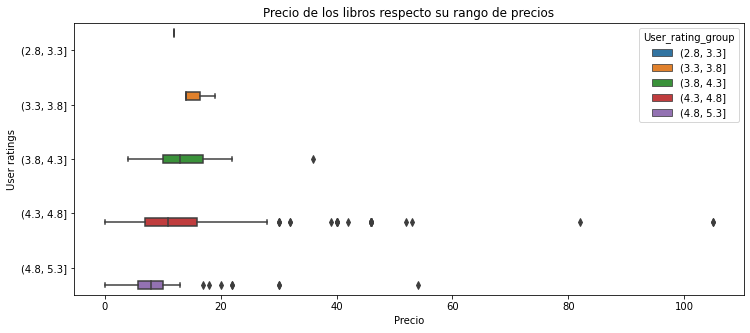

In [59]:
plt.figure(figsize =(12,5))
fig = sns.boxplot(x= df_copia["Price"], y = df_copia["User_rating_group"], data = df_copia, hue = "User_rating_group")
fig.set(xlabel='Precio', ylabel= 'User ratings' )
fig.set_title('Precio de los libros respecto su rango de precios')
plt.show()


Observamos que sí que existen diferencias de precio entre los libros peor valorados (3.3 - 3.8) y los mejores valorados (4.8 y 5.3). Podríamos afirmar que los libros mejorar valorados tienen unos precios significativamente más bajos.